# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [ ]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2020-10-31 14:08:12--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zey0gx91pna8irj/mieszkania.csv [following]
--2020-10-31 14:08:12--  https://www.dropbox.com/s/dl/zey0gx91pna8irj/mieszkania.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2310aeb6c6d5c6e8617d433472.dl.dropboxusercontent.com/cd/0/get/BCS0gJiVjziwWJ-reY6hVFZx23TXYXSIrZV-yb3W1wwTUtMwGJKgAspTfc5x5R11gCvaOrQoMWu0Q1cGOC3pM5pbNx1T0J_m_V0ub_p-5T_2PQ/file?dl=1# [following]
--2020-10-31 14:08:12--  https://uc2310aeb6c6d5c6e8617d433472.dl.dropboxusercontent.com/cd/0/get/BCS0gJiVjziwWJ-reY6hVFZx23TXYXSIrZV-yb3W1wwTUtMwGJKgAspTfc5x5R11gCvaOrQoMWu0Q1cGOC3pM5pbNx1T0J_m_V0ub_p-5T_2PQ/file?dl=1
Resolv

In [ ]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilosc_sypialni,ilosc_lazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [ ]:
import math
def msle(ys, ps):
    assert len(ys) == len(ps)
    result = 0
    for i in range(len(ys)):
      result += (math.log(1 + ys[i]) - math.log(1 + ps[i])) ** 2
    result /= len(ys)
    return result

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [ ]:
###################################################
# TODO: Compute msle for outputing the mean price #
###################################################
import csv
import statistics
with open('mieszkania.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  prices = []
  firstline = True
  for row in reader:
    if not firstline:
      prices.append(int(row[len(row) - 1]))
    else:
      firstline = False
  mean = statistics.mean(prices)
  prediction_1 = [mean] * len(prices)
  loss_1 = msle(prices, prediction_1)
  print(loss_1)

0.3915253538257009


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [ ]:
#############################################
# TODO: Find this constant and compute msle #
#############################################
def find_optimal_constant(ys):
  result = 1
  power = 1 / float(len(ys))
  for i in range(len(ys)):
    result *= (ys[i] + 1) ** power
  return result - 1
c = find_optimal_constant(prices)
print(c)
print(msle(prices, [c] * len(prices)))

431435.4915823436
0.36488961221335897


Now, let's implement a standard linear regression model. 

[507963.6953045406, 503822.49925482424, 506524.29994112987, 504468.02228290273, 525895.2661740187, 502612.5879219705, 494623.3631717602, 489678.1740767913, 504002.7110861361, 532339.1852529397, 496477.75049184985, 524660.6241847674, 502248.33406231314, 529897.6526127267, 530712.3934238866, 505631.5367595689, 505015.9164771425, 509990.82530880906, 495410.798410237, 523105.4373672393, 509809.1617399839, 528591.8269952143, 497520.72479263565, 506299.8598164669, 525560.9899879416, 509221.33273962524, 512971.95960499824, 520374.9431810015, 505151.79215156555, 504812.10242419195, 533046.3824570533, 505251.9482633233, 496932.2128651963, 489535.60474113445, 511631.169630538, 520994.60081445985, 495641.039705122, 505818.0782523766, 499752.2486608121, 507764.9543083122, 514758.69037055864, 516505.44691011717, 503186.52982563956, 523140.3155751307, 502685.108625517, 506420.8268972517, 484624.27018447407, 507596.0554392278, 504277.1806743721, 490777.3336562095, 494213.8574631928, 496814.0256049423

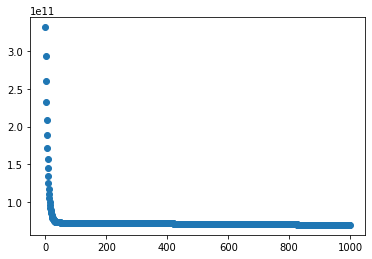

In [ ]:
##########################################################
# TODO: Implement linear regression and compute its msle #
##########################################################
import pandas as pd
import matplotlib.pyplot as plt
def l2_loss(ys1, ps1):
    assert len(ys1) == len(ps1)
    result = 0
    for i in range(len(ys1)):
      result += (ys1[i] - ps1[i]) ** 2
    result /= len(ys1)
    return result

def prediction(xs, betas):
  i = 0
  preds = []
  while (i < len(xs[0])):
    pred = 0
    for j in range(len(betas) - 1):
      pred += xs[j][i] * betas[j]
    pred += betas[len(betas) - 1]
    i += 1
    preds.append(pred)
  return preds

def derivative(ys, ps, xi):
  assert len(ys) == len(ps)
  result_r = 0
  for i in range(len(ys)):
    result_r += (ps[i] - ys[i]) * xi[i]
  result_r /= (len(ys)/2)
  return result_r

housing = pd.DataFrame(pd.read_csv("mieszkania.csv"))
districts = pd.get_dummies(housing['dzielnica'])
data = []

data.append(housing['m2'])
data.append(housing['ilość_sypialni'])
data.append(housing['ilość_łazienek'])
data.append(housing['rok_budowy'])
data.append(housing['parking_podziemny'])

for district in districts:
  data.append(districts[district])

betas = [0.] * (len(data) + 1)

n_epochs = 1000
lr = 0.00000001
losses = []
for i in range(n_epochs):
  predictions = prediction(data, betas)
  losses.append(l2_loss(housing['cena'], predictions))
  for j in range(len(betas) - 1):
    betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, data[j])
  j = len(betas) - 1
  betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, [1] * 200)
print(predictions)
axis_x = [i for i in range(len(losses))]
plt.scatter(axis_x, losses)
print(betas)
print(data)
print(msle(housing['cena'], predictions))

Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change the algorithm.
</sup></sub></sup></sub></sup></sub>

[494924.30219010037, 501913.69466798037, 489069.81412765867, 489918.4200059887, 504819.9009510663, 493906.22400905826, 489854.6303771843, 491265.2305104458, 502645.4708523112, 513357.69059505424, 489716.6697925595, 505954.63775904954, 488592.42877117585, 514185.0955954213, 511342.7943225941, 496960.8501251626, 491392.3824147101, 503939.4945858332, 492304.50387492, 503462.3747369237, 499357.6915711402, 511947.2365308378, 492421.2908138241, 495072.79749569553, 505763.9623448439, 496196.97198934486, 501457.66598979203, 506198.7502375888, 498859.22445650405, 488253.17859613826, 513156.34902525315, 508489.61911745794, 493110.5432374838, 492219.88798710593, 497533.6265314398, 507195.47741594625, 494001.4780367876, 493121.2092894813, 500725.8559251981, 503335.009812865, 509497.18998052285, 500450.2336353944, 493938.01812159043, 505148.66260391695, 497278.94553704234, 503260.62186694884, 487616.78292935377, 501881.9892335809, 497607.68546181114, 490363.69091745873, 487425.8127191153, 488772.88

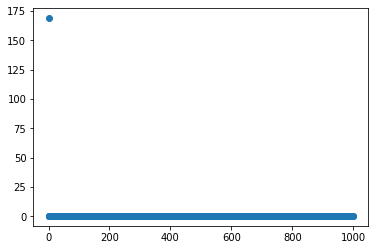

In [ ]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################
import pandas as pd
import matplotlib.pyplot as plt


def prediction(xs, betas):
  i = 0
  preds = []
  while (i < len(xs[0])):
    pred = 0
    for j in range(len(betas) - 1):
      pred += xs[j][i] * betas[j]
    pred += betas[len(betas) - 1]
    i += 1
    preds.append(pred)
  return preds

def derivative(ys, ps, xi):
  assert len(ys) == len(ps)
  result_r = 0
  for i in range(len(ys)):
    result_r += (math.log(ps[i] + 1) - math.log(ys[i] + 1))/(1 + ps[i]) * xi[i]
  result_r /= (len(ys)/2)
  return result_r

housing = pd.DataFrame(pd.read_csv("mieszkania.csv"))
districts = pd.get_dummies(housing['dzielnica'])
data = []

data.append(housing['m2'])
data.append(housing['ilość_sypialni'])
data.append(housing['ilość_łazienek'])
data.append(housing['rok_budowy'])
data.append(housing['parking_podziemny'])

for district in districts:
  data.append(districts[district])

betas = [0.] * (len(data) + 1)

n_epochs = 1000
lr = 0.005
losses = []
for i in range(n_epochs):
  predictions = prediction(data, betas)
  losses.append(msle(housing['cena'], predictions))
  for j in range(len(betas) - 1):
    betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, data[j])
  j = len(betas) - 1
  betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, [1] * 200)
print(predictions)
axis_x = [i for i in range(len(losses))]
plt.scatter(axis_x, losses)
print(msle(housing['cena'], predictions))

Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

[780092.8781250801, 346926.8591636128, 521566.6404533383, 830961.7624314388, 1090467.1847153206, 599065.2327882468, 463648.9449925748, 166805.83970684966, 318864.9980251375, 1011386.5153115394, 429467.04515649204, 1051597.402237933, 563471.1866041517, 620445.6987740558, 1097765.0149171716, 645203.7182853462, 776120.6434548504, 367870.95013479213, 256270.61104375683, 1009993.0238652609, 380217.2389724679, 980552.3193359518, 290701.45735456335, 788214.4030284281, 1064699.9147396078, 757999.7479404488, 652031.7173042758, 513193.5047599593, 505032.9306795907, 478122.0461088378, 548904.0032234603, 112657.14643014631, 291178.2476068263, 128330.2939851409, 629147.343820537, 481112.04371620115, 330790.09263147623, 451869.2694531046, 232049.03556272236, 392338.3766589931, 305254.64827599056, 922614.8009797909, 452193.1244708225, 994026.6936099738, 488403.56639415206, 384498.56403948873, 105576.87100085127, 496041.4237867576, 528220.1431539553, 156269.82914304908, 390192.9127518866, 330504.25720

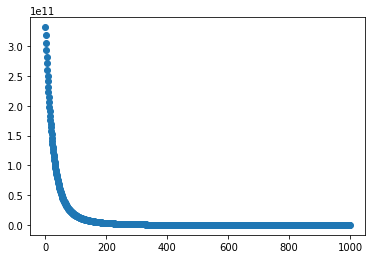

In [ ]:
###############################################
# TODO: Implement the feature engieering part #
###############################################
import pandas as pd
import matplotlib.pyplot as plt
def l2_loss(ys1, ps1):
    assert len(ys1) == len(ps1)
    result = 0
    for i in range(len(ys1)):
      result += (ys1[i] - ps1[i]) ** 2
    result /= len(ys1)
    return result

def prediction(xs, betas):
  i = 0
  preds = []
  while (i < len(xs[0])):
    pred = 0
    for j in range(len(betas) - 1):
      pred += xs[j][i] * betas[j]
    pred += betas[len(betas) - 1]
    i += 1
    preds.append(pred)
  return preds

def derivative(ys, ps, xi):
  assert len(ys) == len(ps)
  result_r = 0
  for i in range(len(ys)):
    result_r += (ps[i] - ys[i]) * xi[i]
  result_r /= (len(ys)/2)
  return result_r

def prepare_data(filename):
  housing = pd.DataFrame(pd.read_csv(filename))
  districts = pd.get_dummies(housing['dzielnica'])
  data = []

  data.append(housing['m2'])
  data.append(housing['ilość_sypialni'])
  data.append(housing['ilość_łazienek'])
  data.append(housing['rok_budowy'])
  data.append(housing['parking_podziemny'])

  district_data = []
  for district in districts:
    district_data.append(districts[district])

  additional_data = []
  for d in district_data:
    row = [a * b for a, b in zip(d, housing['cena'])]
    data.append(row)
  return data


data = prepare_data('mieszkania.csv')

betas = [0.] * (len(data) + 1)

n_epochs = 1000
lr = 0.0000000000001
losses = []
for i in range(n_epochs):
  predictions = prediction(data, betas)
  losses.append(l2_loss(housing['cena'], predictions))
  for j in range(len(betas) - 1):
    betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, data[j])
  j = len(betas) - 1
  betas[j] = betas[j] - lr * derivative(housing['cena'], predictions, [1] * len(housing['cena']))
print(predictions)
axis_x = [i for i in range(len(losses))]
plt.scatter(axis_x, losses)

3.2663435694120306e-06


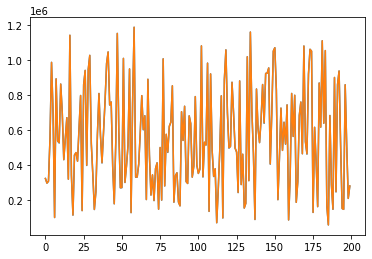

In [ ]:
##############################################################
# TODO: Test your solution on the training and test datasets #
##############################################################

test_data = prepare_data('mieszkania_test.csv')
prediction_test = prediction(test_data, betas)

x_axis_test = [i for i in range(len(prediction_test))]
test_prices = pd.DataFrame(pd.read_csv("mieszkania_test.csv"))['cena']

plt.plot(x_axis_test, prediction_test)
plt.plot(x_axis_test, test_prices)

print(msle(test_prices, prediction_test))

In [ ]:
!head mieszkania_test.csv

m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499
